# IS 362 - Final Project

### The goal of this final project is to determine whether there is a correlation between global maternal mortality rates, antenatal visits, and births that are attended by skilled health personnel.

### The data is sourced from the World Health Organization's Global Health Observatory.

In [21]:
# Import libraries

import numpy as num
import matplotlib.pyplot as plot
import pandas as pan

%matplotlib inline

## Acquire the data

In [22]:
# Read the information from .CSV files into pandas.

# Data acquired from https://www.who.int/data/gho/data/indicators/indicator-details/GHO/antenatal-care-coverage-at-least-four-visits

ante = pan.read_csv("antenatal_care_coverage_at_least_four_visits.csv")

# Data acquired from https://www.who.int/data/gho/data/indicators/indicator-details/GHO/births-attended-by-skilled-health-personnel-(-)

skilled = pan.read_csv("births_attended_by_skilled_health_personnel.csv")

# Data acquired from https://www.who.int/data/gho/data/indicators/indicator-details/GHO/maternal-mortality-ratio-(per-100-000-live-births)

mratio = pan.read_csv("maternal_mortality_ratio_per_100k_live_births.csv")

In [23]:
# Display the data 

ante.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHS4_154,Antenatal care coverage - at least four visits...,text,AFR,Africa,Country,COD,Democratic Republic of the Congo,Year,2020,...,NaN,NaN,NaN,NaN,NaN,56.0,NaN,Rapport annuel 2020 du secteur de la sante. 2e...,EN,2021-10-27T05:00:00.000Z
1,WHS4_154,Antenatal care coverage - at least four visits...,text,WPR,Western Pacific,Country,SLB,Solomon Islands,Year,2020,...,NaN,NaN,NaN,NaN,NaN,65.4,NaN,DHIS data. Provided during the UHC Country Con...,EN,2021-10-27T05:00:00.000Z
2,WHS4_154,Antenatal care coverage - at least four visits...,text,WPR,Western Pacific,Country,SGP,Singapore,Year,2020,...,NaN,NaN,NaN,NaN,NaN,97.4,NaN,Government administrative databases for outpat...,EN,2021-10-27T05:00:00.000Z
3,WHS4_154,Antenatal care coverage - at least four visits...,text,AFR,Africa,Country,SYC,Seychelles,Year,2020,...,NaN,NaN,NaN,NaN,NaN,99.0,NaN,Annual Health Sector Performance Report 2019. ...,EN,2021-10-27T05:00:00.000Z
4,WHS4_154,Antenatal care coverage - at least four visits...,text,AMR,Americas,Country,VCT,Saint Vincent and the Grenadines,Year,2017-2020,...,NaN,NaN,NaN,NaN,NaN,69.8,NaN,Samoa Demographic and Health Survey - Multiple...,EN,2021-10-27T05:00:00.000Z


In [24]:
# Display the data

mratio.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MDG_0000000026,Maternal mortality ratio (per 100 000 live bir...,text,EUR,Europe,Country,BLR,Belarus,Year,2020,...,NaN,NaN,0.69,NaN,1.72,1.1 [0.69 – 1.7],NaN,NaN,EN,2023-03-08T06:00:00.000Z
1,MDG_0000000026,Maternal mortality ratio (per 100 000 live bir...,text,EUR,Europe,Country,NOR,Norway,Year,2020,...,NaN,NaN,0.98,NaN,2.72,1.7 [0.98 – 2.7],NaN,NaN,EN,2023-03-08T06:00:00.000Z
2,MDG_0000000026,Maternal mortality ratio (per 100 000 live bir...,text,EUR,Europe,Country,ROU,Romania,Year,2020,...,NaN,NaN,7.43,NaN,13.93,10 [7.4 – 14],NaN,NaN,EN,2023-03-08T06:00:00.000Z
3,MDG_0000000026,Maternal mortality ratio (per 100 000 live bir...,text,EUR,Europe,Country,SRB,Serbia,Year,2020,...,NaN,NaN,7.63,NaN,13.83,10 [7.6 – 14],NaN,NaN,EN,2023-03-08T06:00:00.000Z
4,MDG_0000000026,Maternal mortality ratio (per 100 000 live bir...,text,SEAR,South-East Asia,Country,IND,India,Year,2020,...,NaN,NaN,92.75,NaN,110.00,103 [93 – 110],NaN,NaN,EN,2023-03-08T06:00:00.000Z


In [25]:
# Display the data 

skilled.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MDG_0000000025,Births attended by skilled health personnel (%),text,AFR,Africa,Country,NER,Niger,Year,2021,...,NaN,NaN,NaN,NaN,NaN,43.6,NaN,Definition includes other cadres that is not i...,EN,2022-05-09T05:00:00.000Z
1,MDG_0000000025,Births attended by skilled health personnel (%),text,WPR,Western Pacific,Country,FJI,Fiji,Year,2021,...,NaN,NaN,NaN,NaN,NaN,99.8,NaN,Unclear definition of the cadres included. Fij...,EN,2022-05-09T05:00:00.000Z
2,MDG_0000000025,Births attended by skilled health personnel (%),text,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2020-2021,...,NaN,NaN,NaN,NaN,NaN,96.1,NaN,Unclear definition of the cadres included. Vie...,EN,2022-05-09T05:00:00.000Z
3,MDG_0000000025,Births attended by skilled health personnel (%),text,SEAR,South-East Asia,Country,IND,India,Year,2019-2021,...,NaN,NaN,NaN,NaN,NaN,89.4,NaN,Definition includes other cadres that is not i...,EN,2022-05-09T05:00:00.000Z
4,MDG_0000000025,Births attended by skilled health personnel (%),text,AMR,Americas,Country,DMA,Dominica,Year,2020,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,Unclear definition of the cadres included. PLI...,EN,2022-05-09T05:00:00.000Z


## Clean up the data

In [26]:
# Create a new dataframe containing rows that match the specified criteria

clean_ante = ante[(ante['Period'].isin(['2000','2005','2010','2015','2020']))]

In [27]:
# Display new dataframe with only select columns

clean_ante[['Indicator', 'ParentLocation','Location','Period', 'Value']].head()

,Indicator,ParentLocation,Location,Period,Value
0,Antenatal care coverage - at least four visits...,Africa,Democratic Republic of the Congo,2020,56.0
1,Antenatal care coverage - at least four visits...,Western Pacific,Solomon Islands,2020,65.4
2,Antenatal care coverage - at least four visits...,Western Pacific,Singapore,2020,97.4
3,Antenatal care coverage - at least four visits...,Africa,Seychelles,2020,99.0
173,Antenatal care coverage - at least four visits...,Americas,Trinidad and Tobago,2015,100.0


In [28]:
# Convert Period column to a string from an object

mratio['Period']= mratio['Period'].astype(str)

# Create a new dataframe containing rows that match the specified criteria

clean_mratio = mratio[(mratio['Period'].isin(['2000', '2005', '2010', '2015', '2020']))]

In [29]:
# Display new dataframe with only select columns

clean_mratio[['Indicator', 'ParentLocation','Location','Period', 'FactValueNumeric']].head()

,Indicator,ParentLocation,Location,Period,FactValueNumeric
0,Maternal mortality ratio (per 100 000 live bir...,Europe,Belarus,2020,1.10
1,Maternal mortality ratio (per 100 000 live bir...,Europe,Norway,2020,1.66
2,Maternal mortality ratio (per 100 000 live bir...,Europe,Romania,2020,10.07
3,Maternal mortality ratio (per 100 000 live bir...,Europe,Serbia,2020,10.18
4,Maternal mortality ratio (per 100 000 live bir...,South-East Asia,India,2020,102.70


In [30]:
# Create a new dataframe containing rows that match the specified criteria

clean_skilled = skilled[(skilled['Period'].isin(['2000','2005','2010','2015','2020']))]

In [31]:
# Display new dataframe with only select columns

clean_skilled[['Indicator', 'ParentLocation','Location','Period', 'Value']].head()

,Indicator,ParentLocation,Location,Period,Value
4,Births attended by skilled health personnel (%),Americas,Dominica,2020,100.0
5,Births attended by skilled health personnel (%),Europe,Lithuania,2020,100.0
6,Births attended by skilled health personnel (%),Americas,Saint Kitts and Nevis,2020,100.0
7,Births attended by skilled health personnel (%),Americas,Uruguay,2020,100.0
8,Births attended by skilled health personnel (%),Europe,Uzbekistan,2020,100.0


## Analyze the data

In [32]:
# Calculate and display the average percentage of antenatal care coverage globally for each of the five years 

ante_avg = clean_ante.groupby('Period')['Value'].mean()
ante_avg

Period
2000    85.650000
2005    90.880000
2010    92.194737
2015    89.895238
2020    79.450000
Name: Value, dtype: float64

Text(0, 0.5, 'Percent')

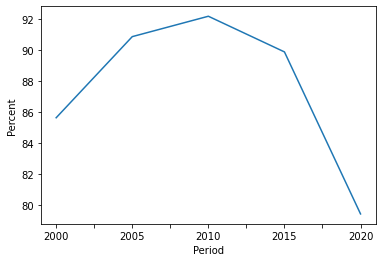

In [33]:
# Plot average percentage of antenatal care coverage globally for each of the five years 

ante_avg.plot()
plot.ylabel('Percent')

In [34]:
# Calculate and display the average maternal mortality ratio globally for each of the five years 

mratio_avg = clean_mratio.groupby('Period')['FactValueNumeric'].mean()
mratio_avg

Period
2000    1332.759270
2005    1172.774622
2010    1045.447892
2015     926.105714
2020     848.197992
Name: FactValueNumeric, dtype: float64

Text(0, 0.5, 'Per 100K')

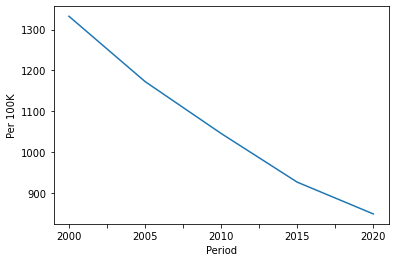

In [35]:
# Plot the average maternal mortality ratio globally for each of the five years 

mratio_avg.plot()
plot.ylabel('Per 100K')

In [36]:
# Calculate and display the average percentage of births attended by skilled health personnel globally for each of the five years 

skilled_avg = clean_skilled.groupby('Period')['Value'].mean()
skilled_avg

Period
2000    81.608931
2005    90.311188
2010    90.094486
2015    94.702316
2020    99.026333
Name: Value, dtype: float64

Text(0, 0.5, 'Percent')

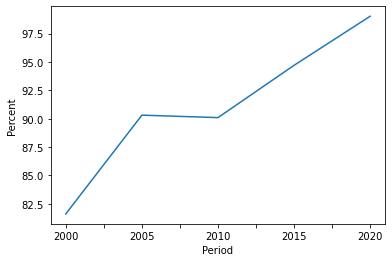

In [37]:
# Plot the average percentage of births attended by skilled health personnel globally for each of the five years 

skilled_avg.plot()
plot.ylabel('Percent')

## Group the data

In [38]:
# Combine the three dataframes

mat_data = pan.DataFrame({'Average Antenatal Care %': ante_avg, \
                          'Average Births Attended by Skilled Health Personnel %': skilled_avg, \
                          'Average Maternal Mortality Ratio Per 100k Live Births':mratio_avg,})

In [39]:
# Display the combined dataframe

mat_data.round(2)

,Average Antenatal Care %,Average Births Attended by Skilled Health Personnel %,Average Maternal Mortality Ratio Per 100k Live Births
Period,,,
2000,85.65,81.61,1332.76
2005,90.88,90.31,1172.77
2010,92.19,90.09,1045.45
2015,89.90,94.70,926.11
2020,79.45,99.03,848.20


## Graph the data

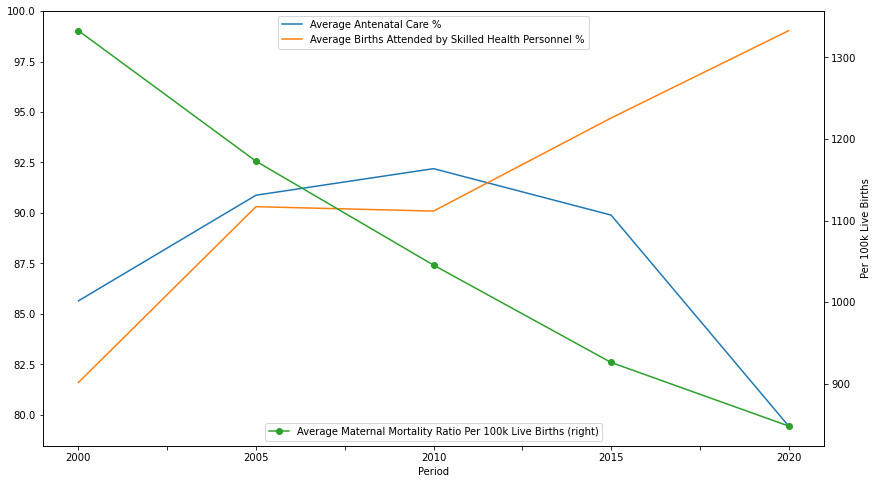

In [40]:
# Plot the combined dataframe to compare the trends

fig = mat_data.plot(y=['Average Antenatal Care %', 'Average Births Attended by Skilled Health Personnel %',], figsize=(14, 8))
ax=mat_data['Average Maternal Mortality Ratio Per 100k Live Births'].plot(secondary_y=True, marker ='o')
ax.set_ylabel('Per 100k Live Births')
ax.legend(loc='lower center')
fig.legend(loc='upper center')

## Conclusion


### Based on the analyses of the data above, there does not appear to be a clear correlation between antenatal care and maternal mortality rates. However, there is a clear correlation between births attended by skilled health personnel and maternal mortality rates; globally, the average maternal mortality rate per 100K live births has declined as the average percentage of births that were attended by skilled health personnel increased. The logical recommendation would then be to recommend that births be attended by skilled health personnel to reduce the likelihood of maternal mortality.